In [ ]:
# Analisis oleh Dinmar Pratama
# Github: https://github.com/dinmar9212
# LinkedIn: https://www.linkedin.com/in/dinmar-pratama-2516b8224/

# Import Library

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

# Memuat Data

In [74]:
# 1. Memuat Data
# Keterangan: Membaca data dari file CSV dan menyimpannya ke dalam DataFrame
file_csv = "survey_purwadhika.csv"
df = pd.read_csv(file_csv)
df.head()
# Pastikan file CSV berada di direktori yang sama atau sesuaikan path-nya.

,ID,Umur,Asal_Daerah,Pendidikan,Informasi_Purwadhika,Tingkat_Kemampuan,kelas,Pengeluaran_Bulanan,gender
0,1,26,Jawa Tengah,S1,Instagram,2,DM,1200000,Pria
1,2,23,Yogyakarta,S1,Teman,3,WD,2000000,Pria
2,3,30,Jawa Tengah,S1,Lainnya,2,DM,1600000,Pria
3,4,27,Bali,S1,Teman,3,DM,1100000,Pria
4,5,24,Jawa Tengah,S1,Lainnya,1,WD,1200000,Pria


# Menghapus Kolom ID

In [77]:
# 2. Menghapus Kolom ID Jika Ada
# Keterangan: Kolom ID tidak diperlukan untuk analisis, jadi dihapus jika ada.
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])
df.head()

,Umur,Asal_Daerah,Pendidikan,Informasi_Purwadhika,Tingkat_Kemampuan,kelas,Pengeluaran_Bulanan,gender
0,26,Jawa Tengah,S1,Instagram,2,DM,1200000,Pria
1,23,Yogyakarta,S1,Teman,3,WD,2000000,Pria
2,30,Jawa Tengah,S1,Lainnya,2,DM,1600000,Pria
3,27,Bali,S1,Teman,3,DM,1100000,Pria
4,24,Jawa Tengah,S1,Lainnya,1,WD,1200000,Pria


# Membersihkan Data

In [81]:
# 3. Membersihkan Data
# Keterangan: Melakukan pembersihan data dengan menghapus baris duplikat dan baris yang memiliki nilai kosong.
# Juga, mengonversi kolom "Umur" dan "Pengeluaran_Bulanan" ke tipe data numerik.
df = df.drop_duplicates()   # Menghapus baris duplikat
df = df.dropna()    # Menghapus baris dengan nilai kosong
df["Umur"] = pd.to_numeric(df["Umur"], errors='coerce')  # Mengonversi kolom "Umur" ke numerik
df["Pengeluaran_Bulanan"] = pd.to_numeric(df["Pengeluaran_Bulanan"], errors='coerce')  # Mengonversi kolom "Pengeluaran_Bulanan" ke numerik

# Membuat Kelompok Usia

In [85]:
# 4. Menambahkan Kelompok Usia
# Keterangan: Membuat fungsi untuk mengelompokkan usia ke dalam kategori dan menambahkan kolom "Kelompok_Umur" ke DataFrame.
def kategori_umur(umur):
    if umur < 18:
        return "<18"
    elif 18 <= umur <= 24:
        return "18-24"
    elif 25 <= umur <= 34:
        return "25-34"
    elif 35 <= umur <= 44:
        return "35-44"
    elif 45 <= umur <= 54:
        return "45-54"
    else:
        return "55+"

df["Kelompok_Umur"] = df["Umur"].apply(kategori_umur)
df[["Umur", "Kelompok_Umur"]].head()
# Keterangan: Setiap nilai di kolom "Umur" diubah menjadi kategori berdasarkan fungsi di atas.

,Umur,Kelompok_Umur
0,26,25-34
1,23,18-24
2,30,25-34
3,27,25-34
4,24,18-24


# Statistik Deskriptif

In [46]:
# 5. Statistik Deskriptif
# Keterangan: Menampilkan ringkasan statistik untuk data numerik dan juga data kategorikal.
print("\nStatistik Deskriptif Data Numerik:")
print(round(df.describe(),2))

print("\nStatistik Deskriptif Data Kategorikal:")
df.describe(include=['object'])


Statistik Deskriptif Data Numerik:
        Umur  Tingkat_Kemampuan  Pengeluaran_Bulanan
count  50.00              50.00                50.00
mean   27.12               2.02           1414000.00
std     4.38               0.82            286434.81
min    20.00               1.00            800000.00
25%    24.00               1.00           1225000.00
50%    27.00               2.00           1400000.00
75%    30.00               3.00           1600000.00
max    39.00               3.00           2000000.00

Statistik Deskriptif Data Kategorikal:


,Asal_Daerah,Pendidikan,Informasi_Purwadhika,kelas,gender,Kelompok_Umur
count,50,50,50,50,50,50
unique,7,2,5,2,2,3
top,Jawa Tengah,S1,Instagram,DM,Pria,25-34
freq,16,46,19,30,45,31


# Visualisasi

## Visualisasi Histplot Pengeluaran Bulanan

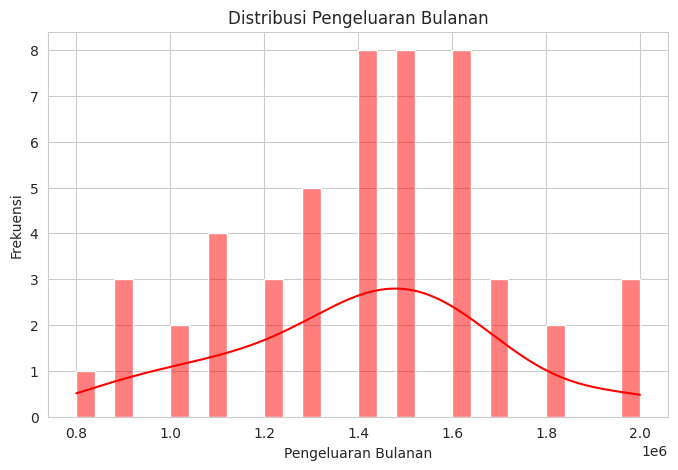

In [49]:
# 6. Visualisasi Histplot Pengeluaran Bulanan
# Keterangan: Membuat histogram untuk melihat sebaran pengeluaran bulanan, dilengkapi dengan kurva kepadatan (KDE).
plt.figure(figsize=(8,5))
sns.histplot(df["Pengeluaran_Bulanan"], bins=30, kde=True, color='red')
plt.title("Distribusi Pengeluaran Bulanan")
plt.xlabel("Pengeluaran Bulanan")
plt.ylabel("Frekuensi")
plt.show()

## Visualisasi Boxplot Pengeluaran Bulanan

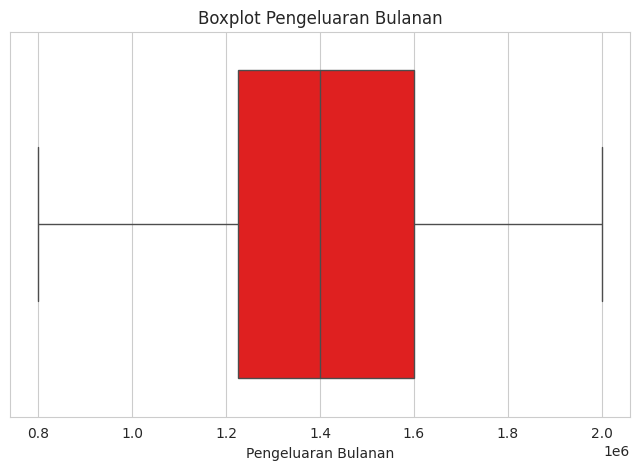

In [48]:
# 7. Visualisasi Boxplot Pengeluaran Bulanan
# Keterangan: Menampilkan boxplot untuk mengidentifikasi sebaran, median, dan outlier dari pengeluaran bulanan.
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Pengeluaran_Bulanan"], color='red')
plt.title("Boxplot Pengeluaran Bulanan")
plt.xlabel("Pengeluaran Bulanan")
plt.show()

## Visualisasi Barplot Rata-rata Pengeluaran Bulanan per Kelompok Usia

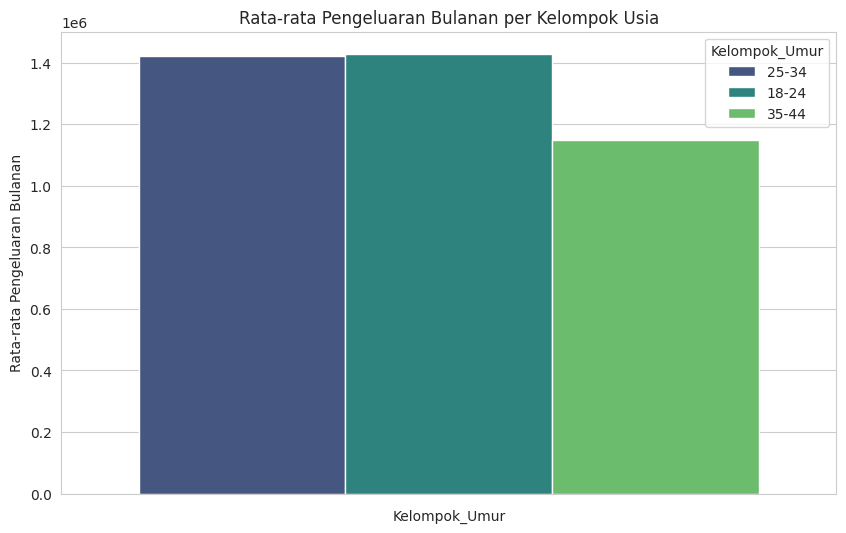

In [54]:
# 8. Visualisasi Bar Plot Rata-rata Pengeluaran Bulanan per Kelompok Usia
# Keterangan: Membuat bar plot untuk membandingkan rata-rata pengeluaran bulanan antar kelompok usia.
plt.figure(figsize=(10,6))
sns.barplot(data=df, hue="Kelompok_Umur", y="Pengeluaran_Bulanan", estimator=np.mean, errorbar=None, palette="viridis")
plt.xticks(rotation=45)
plt.title("Rata-rata Pengeluaran Bulanan per Kelompok Usia")
plt.xlabel("Kelompok_Umur")
plt.ylabel("Rata-rata Pengeluaran Bulanan")
plt.show()

## Visualisasi Countplot Distribusi Kelompok Usia dalam Kelas

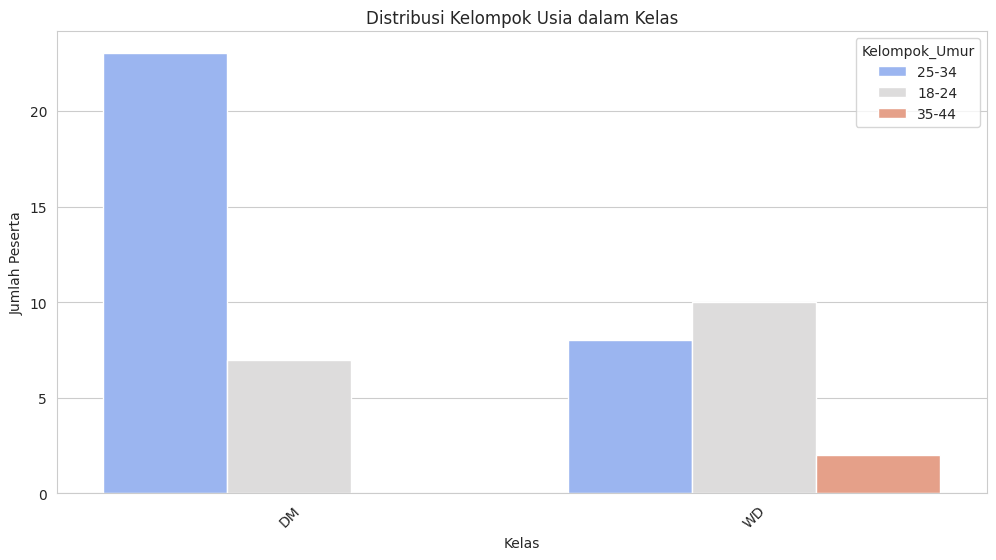

In [62]:
# 15. Visualisasi Countplot Distribusi Kelompok Usia dalam Kelas
# Keterangan: Menampilkan jumlah siswa di masing-masing kelas dengan perincian berdasarkan kelompok usia.
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="kelas", hue="Kelompok_Umur", palette="coolwarm")
plt.title("Distribusi Kelompok Usia dalam Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Peserta")
plt.legend(title="Kelompok_Umur")
plt.xticks(rotation=45)
plt.show()

# Uji Normalitas

## Uji Shapiro-Wilk

In [55]:
# 9. Uji Normalitas (Shapiro-Wilk) untuk Pengeluaran Bulanan
# Keterangan: Uji ini menentukan apakah data pengeluaran bulanan berdistribusi normal.
statis, p_value = stats.shapiro(df["Pengeluaran_Bulanan"].dropna())
print("\nUji Normalitas (Shapiro-Wilk) untuk Pengeluaran Bulanan:")
print(f"Statistik: {statis}, p-value: {p_value}")

if p_value > 0.05:
    print("Hipotesis nol diterima: Data berdistribusi normal.")
else:
    print("Hipotesis nol ditolak: Data tidak berdistribusi normal.")


Uji Normalitas (Shapiro-Wilk) untuk Pengeluaran Bulanan:
Statistik: 0.9703977545563616, p-value: 0.24021278225444082
Hipotesis nol diterima: Data berdistribusi normal.


## Uji Kolmogorov-Smirnov

In [56]:
# 10. Uji Kolmogorov-Smirnov untuk Pengeluaran Bulanan
# Keterangan: Uji ini membandingkan distribusi data dengan distribusi normal sebagai uji tambahan.
statis, p_value = stats.kstest(df["Pengeluaran_Bulanan"].dropna(), 'norm')
print("\nUji Kolmogorov-Smirnov untuk Pengeluaran Bulanan:")
print(f"Statistik: {statis}, p-value: {p_value}")

if p_value > 0.05:
    print("Hipotesis nol diterima: Data mengikuti distribusi normal.")
else:
    print("Hipotesis nol ditolak: Data tidak mengikuti distribusi normal.")


Uji Kolmogorov-Smirnov untuk Pengeluaran Bulanan:
Statistik: 1.0, p-value: 0.0
Hipotesis nol ditolak: Data tidak mengikuti distribusi normal.


## Uji D'Agostino

In [57]:
# Uji Normalitas D'Agostino-Pearson untuk Pengeluaran Bulanan
# Keterangan: Uji ini menggabungkan skewness dan kurtosis untuk menguji normalitas.
stat_dagostino, p_value_dagostino = stats.normaltest(df["Pengeluaran_Bulanan"].dropna())
print("\nUji Normalitas D'Agostino-Pearson untuk Pengeluaran Bulanan:")
print(f"Statistik: {stat_dagostino}, p-value: {p_value_dagostino}")

if p_value_dagostino > 0.05:
    print("Hipotesis nol diterima: Data berdistribusi normal.")
else:
    print("Hipotesis nol ditolak: Data tidak berdistribusi normal.")


Uji Normalitas D'Agostino-Pearson untuk Pengeluaran Bulanan:
Statistik: 0.07688894492896776, p-value: 0.9622851365784326
Hipotesis nol diterima: Data berdistribusi normal.


# Uji Non-Parametrik

## Uji Mann-Whitney U

In [58]:
# 11. Uji Mann-Whitney U antara Kelompok 18-24 dan 25-34
# Keterangan: Uji non-parametrik untuk membandingkan dua kelompok usia pada pengeluaran bulanan.
kelompok1 = df[df["Kelompok_Umur"] == "18-24"]["Pengeluaran_Bulanan"]
kelompok2 = df[df["Kelompok_Umur"] == "25-34"]["Pengeluaran_Bulanan"]
mann_whitney_stat, mann_whitney_p = stats.mannwhitneyu(kelompok1, kelompok2)
print("\nUji Mann-Whitney U antara Kelompok 18-24 dan 25-34:")
print(f"Statistik: {mann_whitney_stat}, p-value: {mann_whitney_p}")

if mann_whitney_p < 0.05:
    print("Hipotesis nol ditolak: Terdapat perbedaan signifikan antara kedua kelompok.")
else:
    print("Hipotesis nol diterima: Tidak terdapat perbedaan signifikan antara kedua kelompok.")


Uji Mann-Whitney U antara Kelompok 18-24 dan 25-34:
Statistik: 277.0, p-value: 0.7775873952514549
Hipotesis nol diterima: Tidak terdapat perbedaan signifikan antara kedua kelompok.


## Uji Chi-Square

In [59]:
# 12. Uji Chi-Square antara Kelompok Usia dan Kelas
# Keterangan: Uji ini menguji apakah terdapat hubungan antara kategori usia dan pilihan kelas.
contingency_table = pd.crosstab(df["Kelompok_Umur"], df["kelas"])
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print("\nUji Chi-Square antara Kelompok Usia dan Kelas:")
print(f"Chi2: {chi2}, p-value: {p}")

if p < 0.05:
    print("Hipotesis nol ditolak: Ada hubungan antara kelompok usia dan pemilihan kelas.")
else:
    print("Hipotesis nol diterima: Tidak ada hubungan antara kelompok usia dan pemilihan kelas.")



Uji Chi-Square antara Kelompok Usia dan Kelas:
Chi2: 8.111954459203035, p-value: 0.017318547713877107
Hipotesis nol ditolak: Ada hubungan antara kelompok usia dan pemilihan kelas.


## Uji Kruskal-Wallis

In [61]:
# 17. Uji Kruskal-Wallis untuk Pengeluaran Bulanan berdasarkan Kelompok Usia
# Keterangan: Uji non-parametrik sebagai alternatif jika data tidak normal, membandingkan peringkat antar kelompok.
kruskal_stat, kruskal_p = kruskal(*kelompok_data)
print("\nUji Kruskal-Wallis untuk Pengeluaran Bulanan berdasarkan Kelompok Usia:")
print(f"Statistik: {kruskal_stat}, p-value: {kruskal_p}")

if kruskal_p < 0.05:
    print("Hipotesis nol ditolak: Ada perbedaan signifikan dalam pengeluaran bulanan antar kelompok usia.")
else:
    print("Hipotesis nol diterima: Tidak ada perbedaan signifikan dalam pengeluaran bulanan antar kelompok usia.")


Uji Kruskal-Wallis untuk Pengeluaran Bulanan berdasarkan Kelompok Usia:
Statistik: 2.2382272972054498, p-value: 0.3265691213785515
Hipotesis nol diterima: Tidak ada perbedaan signifikan dalam pengeluaran bulanan antar kelompok usia.


# Uji Parametrik

## Uji t-Test

In [63]:
# Uji t-Test (Independent t-Test) untuk membandingkan pengeluaran bulanan antara dua kelompok usia (18-24 vs 25-34)
t_stat, t_p = stats.ttest_ind(
    df[df["Kelompok_Umur"] == "18-24"]["Pengeluaran_Bulanan"],
    df[df["Kelompok_Umur"] == "25-34"]["Pengeluaran_Bulanan"],
    equal_var=False  # Gunakan False jika varians kedua kelompok tidak homogen
)
print("\nUji t-Test antara Kelompok 18-24 dan 25-34:")
print(f"Statistik t: {t_stat}, p-value: {t_p}")

if t_p < 0.05:
    print("Hipotesis nol ditolak: Terdapat perbedaan signifikan antara kedua kelompok.")
else:
    print("Hipotesis nol diterima: Tidak terdapat perbedaan signifikan antara kedua kelompok.")


Uji t-Test antara Kelompok 18-24 dan 25-34:
Statistik t: 0.07658866919468318, p-value: 0.9394455279228588
Hipotesis nol diterima: Tidak terdapat perbedaan signifikan antara kedua kelompok.


## Uji ANOVA

In [64]:
# 16. Uji One-Way ANOVA untuk Pengeluaran Bulanan berdasarkan Kelompok Usia
# Keterangan: Menguji apakah terdapat perbedaan rata-rata pengeluaran bulanan di antara berbagai kelompok usia.
kelompok_data = [df[df["Kelompok_Umur"] == k]["Pengeluaran_Bulanan"] for k in df["Kelompok_Umur"].unique()]
anova_stat, anova_p = f_oneway(*kelompok_data)
print("\nUji One-Way ANOVA untuk Pengeluaran Bulanan berdasarkan Kelompok Usia:")
print(f"Statistik: {anova_stat}, p-value: {anova_p}")

if anova_p < 0.05:
    print("Hipotesis nol ditolak: Ada perbedaan signifikan dalam pengeluaran bulanan antar kelompok usia.")
else:
    print("Hipotesis nol diterima: Tidak ada perbedaan signifikan dalam pengeluaran bulanan antar kelompok usia.")


Uji One-Way ANOVA untuk Pengeluaran Bulanan berdasarkan Kelompok Usia:
Statistik: 0.8837916502396105, p-value: 0.41996746958812026
Hipotesis nol diterima: Tidak ada perbedaan signifikan dalam pengeluaran bulanan antar kelompok usia.


# Uji Korelasi

## Uji Korelasi Pearson

In [67]:
# 13. Uji Korelasi Pearson antara Umur dan Pengeluaran Bulanan
# Keterangan: Mengukur kekuatan hubungan linier antara usia dan pengeluaran bulanan.
pearson_corr, pearson_p = stats.pearsonr(df["Umur"], df["Pengeluaran_Bulanan"])
print("\nUji Korelasi Pearson antara Umur dan Pengeluaran Bulanan:")
print(f"Korelasi: {pearson_corr}, p-value: {pearson_p}")

if pearson_p < 0.05:
    print("Hipotesis nol ditolak: Ada hubungan signifikan antara umur dan pengeluaran bulanan.")
else:
    print("Hipotesis nol diterima: Tidak ada hubungan signifikan antara umur dan pengeluaran bulanan.")


Uji Korelasi Pearson antara Umur dan Pengeluaran Bulanan:
Korelasi: -0.11202617158370333, p-value: 0.43860451967559133
Hipotesis nol diterima: Tidak ada hubungan signifikan antara umur dan pengeluaran bulanan.


## Uji Korelasi Spearman

In [68]:
# 14. Uji Korelasi Spearman antara Umur dan Pengeluaran Bulanan
# Keterangan: Mengukur hubungan monotonic antara usia dan pengeluaran bulanan (alternatif non-parametrik).
spearman_corr, spearman_p = stats.spearmanr(df["Umur"], df["Pengeluaran_Bulanan"])
print("\nUji Korelasi Spearman antara Umur dan Pengeluaran Bulanan:")
print(f"Korelasi: {spearman_corr}, p-value: {spearman_p}")

if spearman_p < 0.05:
    print("Hipotesis nol ditolak: Ada hubungan signifikan antara umur dan pengeluaran bulanan.")
else:
    print("Hipotesis nol diterima: Tidak ada hubungan signifikan antara umur dan pengeluaran bulanan.")


Uji Korelasi Spearman antara Umur dan Pengeluaran Bulanan:
Korelasi: -0.09491249631550529, p-value: 0.5120555168773797
Hipotesis nol diterima: Tidak ada hubungan signifikan antara umur dan pengeluaran bulanan.


# Uji Perbedaan Proporsi

In [72]:
# 19. Uji Perbedaan Proporsi antara Kelompok 18-24 dan 25-34 untuk Kelas "Reguler"
# Menghitung jumlah siswa yang memilih kelas "Reguler" pada masing-masing kelompok usia.
jumlah_18_24 = df[(df["Kelompok_Umur"] == "18-24") & (df["kelas"] == "Reguler")].shape[0]
total_18_24 = df[df["Kelompok_Umur"] == "18-24"].shape[0]
jumlah_25_34 = df[(df["Kelompok_Umur"] == "25-34") & (df["kelas"] == "Reguler")].shape[0]
total_25_34 = df[df["Kelompok_Umur"] == "25-34"].shape[0]

# Menyusun array jumlah kasus dan total sampel untuk kedua kelompok
jumlah_kasus = np.array([jumlah_18_24, jumlah_25_34])
total_sampel = np.array([total_18_24, total_25_34])

# Melakukan uji z untuk dua proporsi
stat_z, p_z = proportions_ztest(jumlah_kasus, total_sampel)
print("\nUji Perbedaan Proporsi antara Kelompok 18-24 dan 25-34 untuk kelas 'Reguler':")
print(f"Statistik Z: {stat_z:.3f}, p-value: {p_z:.3f}")

if p_z < 0.05:
    print("Hipotesis nol ditolak: Terdapat perbedaan proporsi yang signifikan antara kedua kelompok.")
else:
    print("Hipotesis nol diterima: Tidak terdapat perbedaan proporsi yang signifikan antara kedua kelompok.")


Uji Perbedaan Proporsi antara Kelompok 18-24 dan 25-34 untuk kelas 'Reguler':
Statistik Z: nan, p-value: nan
Hipotesis nol diterima: Tidak terdapat perbedaan proporsi yang signifikan antara kedua kelompok.


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std
